<a href="https://colab.research.google.com/github/StathisKratimenos/Colab/blob/main/Goals%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print(df.head())


Saving events.csv to events.csv
     id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... player_in player_out  \
0     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   
1     1  Borussia Dortmund         Hamburg SV  ...       NaN

In [47]:
# Αν υπάρχει η στήλη "is_goal"
if "is_goal" in df.columns:
    df_goals = df[df["is_goal"] == 1].copy()
# Αν υπάρχει η στήλη "event_type"
elif "event_type" in df.columns:
    df_goals = df[df["event_type"].str.lower() == "goal"].copy()
else:
    raise ValueError("Δεν βρέθηκε ούτε 'is_goal' ούτε 'event_type' στο dataset!")

# Προαιρετικά: κρατάμε μόνο χρήσιμες στήλες
cols = ["match_id", "time", "event_team", "opponent", "event_type", "is_goal", "event_time"]
df_goals = df_goals[[c for c in cols if c in df_goals.columns]].copy()

# Δες τα πρώτα 5 rows
df_goals.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24446 entries, 13 to 940948
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        24446 non-null  int64 
 1   event_team  24446 non-null  object
 2   opponent    24446 non-null  object
 3   event_type  24446 non-null  int64 
 4   is_goal     24446 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [52]:
print("Σύνολο goals:", len(df_goals))


Σύνολο goals: 24446


In [50]:
df_goals

,time,event_team,opponent,event_type,is_goal
13,17,Borussia Dortmund,Hamburg SV,1,1
26,29,Borussia Dortmund,Hamburg SV,1,1
50,49,Borussia Dortmund,Hamburg SV,1,1
92,80,Hamburg SV,Borussia Dortmund,1,1
175,48,SC Freiburg,FC Augsburg,1,1
...,...,...,...,...,...
940713,24,AS Monaco,Lorient,1,1
940716,28,AS Monaco,Lorient,1,1
940722,37,AS Monaco,Lorient,1,1
940742,59,AS Monaco,Lorient,1,1


In [57]:
import numpy as np

# Ensure integers
df_goals["time"] = df_goals["time"].astype(int)

# Δημιουργία interval ανά 10 λεπτά
df_goals["interval"] = (df_goals["time"] // 10) * 10

# Προαιρετικά: cap > 90 σε 90
df_goals.loc[df_goals["interval"] > 90, "interval"] = 90

df_goals.head(10)


,time,event_team,opponent,event_type,is_goal,interval
13,17,Borussia Dortmund,Hamburg SV,1,1,10
26,29,Borussia Dortmund,Hamburg SV,1,1,20
50,49,Borussia Dortmund,Hamburg SV,1,1,40
92,80,Hamburg SV,Borussia Dortmund,1,1,80
175,48,SC Freiburg,FC Augsburg,1,1,40
183,53,FC Augsburg,SC Freiburg,1,1,50
184,55,SC Freiburg,FC Augsburg,1,1,50
211,81,FC Augsburg,SC Freiburg,1,1,80
317,60,Werder Bremen,Kaiserslautern,1,1,60
353,81,Werder Bremen,Kaiserslautern,1,1,80


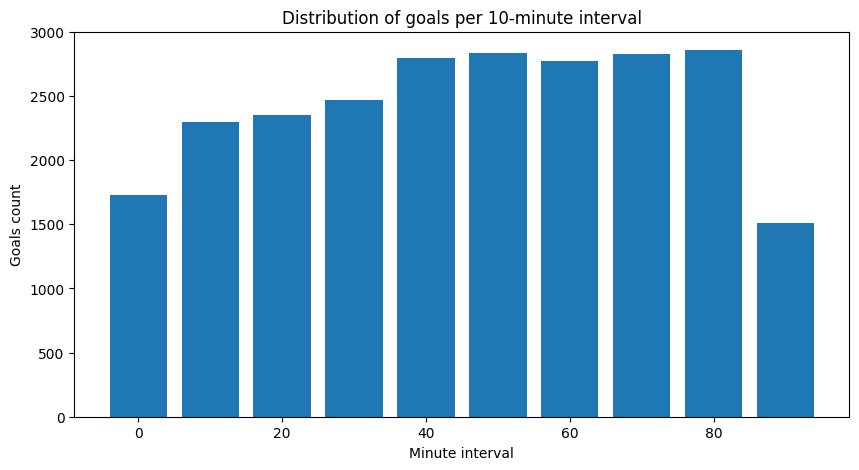

In [58]:
# Group by interval και μετράμε γκολ
goals_by_interval = df_goals.groupby("interval").size().reset_index(name="goals_count")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(goals_by_interval["interval"], goals_by_interval["goals_count"], width=8)
plt.xlabel("Minute interval")
plt.ylabel("Goals count")
plt.title("Distribution of goals per 10-minute interval")
plt.show()


In [60]:
# Μοναδικά λεπτά γκολ
unique_minutes = df_goals["time"].unique()
unique_minutes.sort()  # προαιρετικά ταξινόμηση
print(unique_minutes)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


In [61]:
# ensure integer
df_goals["time"] = df_goals["time"].astype(int)

# interval ανά 20 λεπτά
df_goals["interval_20"] = (df_goals["time"] // 20) * 20

# cap > 90 σε 80 ή 100 αν θέλεις
df_goals.loc[df_goals["interval_20"] > 80, "interval_20"] = 80

df_goals.head(10)


,time,event_team,opponent,event_type,is_goal,interval,interval_20
13,17,Borussia Dortmund,Hamburg SV,1,1,10,0
26,29,Borussia Dortmund,Hamburg SV,1,1,20,20
50,49,Borussia Dortmund,Hamburg SV,1,1,40,40
92,80,Hamburg SV,Borussia Dortmund,1,1,80,80
175,48,SC Freiburg,FC Augsburg,1,1,40,40
183,53,FC Augsburg,SC Freiburg,1,1,50,40
184,55,SC Freiburg,FC Augsburg,1,1,50,40
211,81,FC Augsburg,SC Freiburg,1,1,80,80
317,60,Werder Bremen,Kaiserslautern,1,1,60,60
353,81,Werder Bremen,Kaiserslautern,1,1,80,80


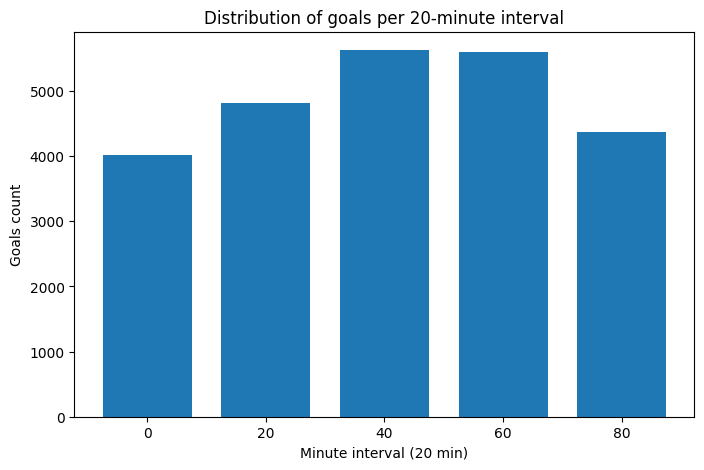

In [62]:
goals_by_interval_20 = df_goals.groupby("interval_20").size().reset_index(name="goals_count")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(goals_by_interval_20["interval_20"], goals_by_interval_20["goals_count"], width=15)
plt.xlabel("Minute interval (20 min)")
plt.ylabel("Goals count")
plt.title("Distribution of goals per 20-minute interval")
plt.show()


In [63]:
import numpy as np

# ensure integer
df_goals["time"] = df_goals["time"].astype(int)

# Δημιουργία intervals 0-20,10-30,20-40,...80-100
interval_edges = np.arange(0, 101, 10)  # 0,10,20,...,100
interval_labels = [f"{start}-{start+20}" for start in interval_edges[:-2]]  # έως 80-100

# Δημιουργία DataFrame για να μετρήσουμε
counts = []
for start in interval_edges[:-2]:  # 0-80
    end = start + 20
    count = ((df_goals["time"] >= start) & (df_goals["time"] < end)).sum()
    counts.append({"interval": f"{start}-{end}", "goals_count": count})

df_interval_sliding = pd.DataFrame(counts)
df_interval_sliding


,interval,goals_count
0,0-20,4023
1,10-30,4648
2,20-40,4821
3,30-50,5262
4,40-60,5631
5,50-70,5607
6,60-80,5600
7,70-90,5688
8,80-100,4371


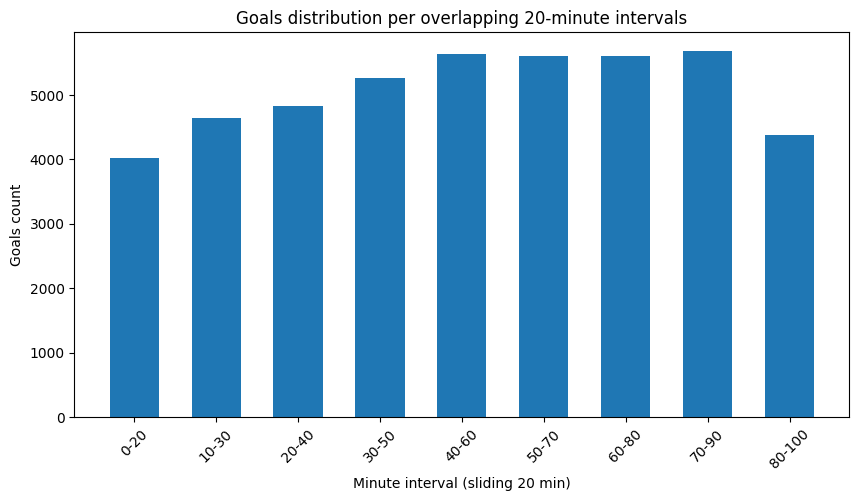

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_interval_sliding["interval"], df_interval_sliding["goals_count"], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.show()


/tmp/ipython-input-3009511824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


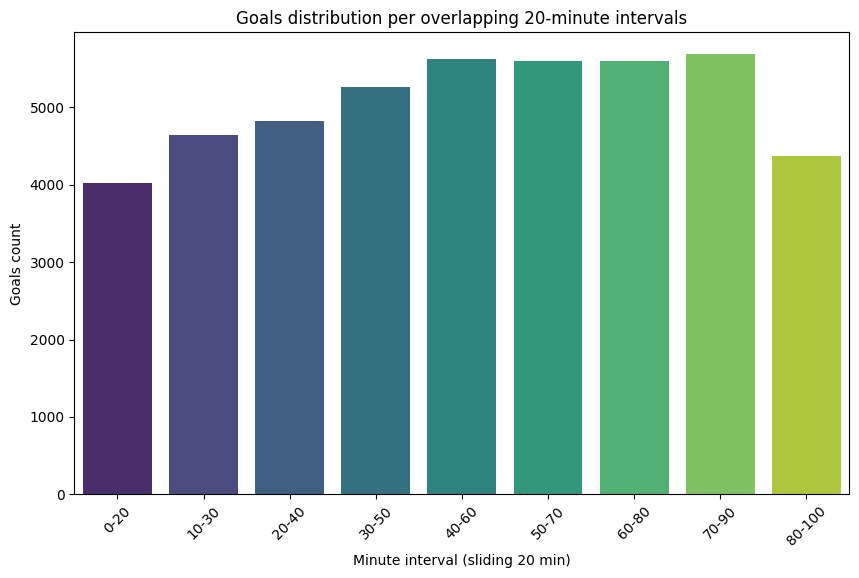

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_interval_sliding,
    x="interval",
    y="goals_count",
    palette="viridis"  # ωραίο gradient
)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.xticks(rotation=45)
plt.show()


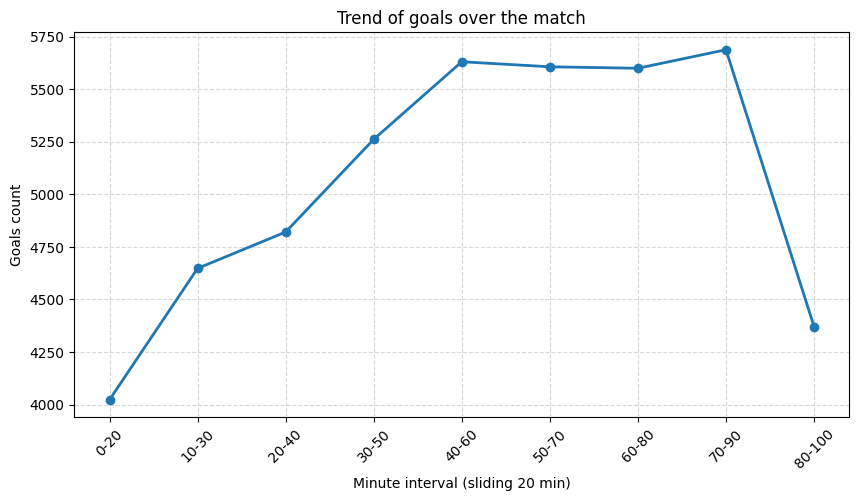

In [66]:
plt.figure(figsize=(10,5))
plt.plot(df_interval_sliding["interval"], df_interval_sliding["goals_count"], marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Trend of goals over the match")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


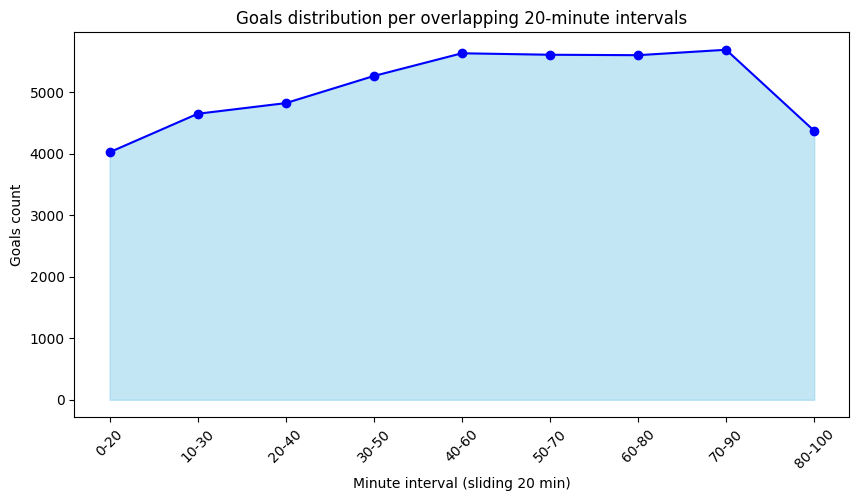

In [67]:
plt.figure(figsize=(10,5))
plt.fill_between(df_interval_sliding["interval"], df_interval_sliding["goals_count"], color='skyblue', alpha=0.5)
plt.plot(df_interval_sliding["interval"], df_interval_sliding["goals_count"], marker='o', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.show()
